In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.imputation import MeanMedianImputer
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor


In [30]:
# read data
data = pd.read_csv("CurrentDetachedOnly.csv")
data

,Price,Bedrooms,Bathrooms,Latitude,Longitude,Length,Shape_Leng,x_centroid,y_centroid,MUNICIPLAITY,Parcel_Perimeter (m),Parcel_Area (m2),Parcel_Length(m),Parcel_Width (m),Size,Building_Style,WARD,NEIGHBORHOOD_FORMAL
0,949000,4,3,43.759127,-79.595991,85,2547.048573,-79.595985,43.759142,Etobicoke,84.639104,292.871942,33.604220,8.715332,NaN,2-Storey,Etobicoke North,Mount Olive-Silverstone-Jamestown
1,1129000,3,2,43.760643,-79.523830,104,889.485203,-79.523845,43.760658,North York,103.697992,557.878285,36.610999,15.237997,1100.0,Bungalow-Raised,Humber River-Black Creek,Black Creek
2,1249777,3,3,43.765768,-79.523242,103,4138.393035,-79.523240,43.765785,North York,103.470210,564.745936,36.084418,15.650687,NaN,Bungalow,Humber River-Black Creek,Black Creek
3,1074990,3,2,43.761724,-79.525569,104,4138.393035,-79.525520,43.761725,North York,104.117413,571.592287,36.321823,15.736883,NaN,Bungalow,Humber River-Black Creek,Black Creek
4,1049000,3,2,43.757508,-79.595617,76,694.568666,-79.595606,43.757498,Etobicoke,75.581066,283.108540,27.493089,10.297444,1100.0,2-Storey,Etobicoke North,Mount Olive-Silverstone-Jamestown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,2199000,4,5,43.783996,-79.442810,77,2384.762078,-79.442746,43.784000,North York,76.918847,250.292084,30.160847,8.298576,3000.0,2-Storey,Willowdale,Newtonbrook West
2469,1688000,4,5,43.783823,-79.443242,77,2384.762078,-79.443294,43.783801,North York,76.909186,250.259439,30.155677,8.298916,3000.0,3-Storey,Willowdale,Newtonbrook West
2470,1299000,3,1,43.666812,-79.498784,82,1427.919879,-79.498751,43.666779,York,82.177301,242.605772,33.940725,7.147925,1100.0,2-Storey,York South-Weston,Rockcliffe-Smythe
2471,1350000,6,4,43.705147,-79.361646,76,560.084178,-79.361713,43.705115,East York,76.262341,227.364428,30.733152,7.398019,NaN,2-Storey,Don Valley West,Leaside-Bennington


In [31]:
data.MUNICIPLAITY.value_counts()

MUNICIPLAITY
Scarborough       688
North York        667
Etobicoke         447
former Toronto    349
York              195
East York         127
Name: count, dtype: int64

In [32]:
data = data.join(pd.get_dummies(data.MUNICIPLAITY, dtype=int)).drop(['MUNICIPLAITY'], axis=1)
data

,Price,Bedrooms,Bathrooms,Latitude,Longitude,Length,Shape_Leng,x_centroid,y_centroid,Parcel_Perimeter (m),...,Size,Building_Style,WARD,NEIGHBORHOOD_FORMAL,East York,Etobicoke,North York,Scarborough,York,former Toronto
0,949000,4,3,43.759127,-79.595991,85,2547.048573,-79.595985,43.759142,84.639104,...,NaN,2-Storey,Etobicoke North,Mount Olive-Silverstone-Jamestown,0,1,0,0,0,0
1,1129000,3,2,43.760643,-79.523830,104,889.485203,-79.523845,43.760658,103.697992,...,1100.0,Bungalow-Raised,Humber River-Black Creek,Black Creek,0,0,1,0,0,0
2,1249777,3,3,43.765768,-79.523242,103,4138.393035,-79.523240,43.765785,103.470210,...,NaN,Bungalow,Humber River-Black Creek,Black Creek,0,0,1,0,0,0
3,1074990,3,2,43.761724,-79.525569,104,4138.393035,-79.525520,43.761725,104.117413,...,NaN,Bungalow,Humber River-Black Creek,Black Creek,0,0,1,0,0,0
4,1049000,3,2,43.757508,-79.595617,76,694.568666,-79.595606,43.757498,75.581066,...,1100.0,2-Storey,Etobicoke North,Mount Olive-Silverstone-Jamestown,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,2199000,4,5,43.783996,-79.442810,77,2384.762078,-79.442746,43.784000,76.918847,...,3000.0,2-Storey,Willowdale,Newtonbrook West,0,0,1,0,0,0
2469,1688000,4,5,43.783823,-79.443242,77,2384.762078,-79.443294,43.783801,76.909186,...,3000.0,3-Storey,Willowdale,Newtonbrook West,0,0,1,0,0,0
2470,1299000,3,1,43.666812,-79.498784,82,1427.919879,-79.498751,43.666779,82.177301,...,1100.0,2-Storey,York South-Weston,Rockcliffe-Smythe,0,0,0,0,1,0
2471,1350000,6,4,43.705147,-79.361646,76,560.084178,-79.361713,43.705115,76.262341,...,NaN,2-Storey,Don Valley West,Leaside-Bennington,1,0,0,0,0,0


In [33]:
data.Building_Style.value_counts()

Building_Style
2-Storey           1146
Bungalow            670
1 1/2 Storey        132
Bungalow-Raised     114
3-Storey            106
2 1/2 Storey         66
Sidesplit 4          55
Backsplit 3          54
Backsplit 4          52
Sidesplit 3          42
Backsplit 5          16
Bungaloft             9
Other                 7
Sidesplit 5           4
Name: count, dtype: int64

In [34]:
data = data.join(pd.get_dummies(data.Building_Style, dtype=int)).drop(['Building_Style'], axis=1)
data

,Price,Bedrooms,Bathrooms,Latitude,Longitude,Length,Shape_Leng,x_centroid,y_centroid,Parcel_Perimeter (m),...,Backsplit 3,Backsplit 4,Backsplit 5,Bungaloft,Bungalow,Bungalow-Raised,Other,Sidesplit 3,Sidesplit 4,Sidesplit 5
0,949000,4,3,43.759127,-79.595991,85,2547.048573,-79.595985,43.759142,84.639104,...,0,0,0,0,0,0,0,0,0,0
1,1129000,3,2,43.760643,-79.523830,104,889.485203,-79.523845,43.760658,103.697992,...,0,0,0,0,0,1,0,0,0,0
2,1249777,3,3,43.765768,-79.523242,103,4138.393035,-79.523240,43.765785,103.470210,...,0,0,0,0,1,0,0,0,0,0
3,1074990,3,2,43.761724,-79.525569,104,4138.393035,-79.525520,43.761725,104.117413,...,0,0,0,0,1,0,0,0,0,0
4,1049000,3,2,43.757508,-79.595617,76,694.568666,-79.595606,43.757498,75.581066,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,2199000,4,5,43.783996,-79.442810,77,2384.762078,-79.442746,43.784000,76.918847,...,0,0,0,0,0,0,0,0,0,0
2469,1688000,4,5,43.783823,-79.443242,77,2384.762078,-79.443294,43.783801,76.909186,...,0,0,0,0,0,0,0,0,0,0
2470,1299000,3,1,43.666812,-79.498784,82,1427.919879,-79.498751,43.666779,82.177301,...,0,0,0,0,0,0,0,0,0,0
2471,1350000,6,4,43.705147,-79.361646,76,560.084178,-79.361713,43.705115,76.262341,...,0,0,0,0,0,0,0,0,0,0


In [35]:
data.WARD.value_counts()

WARD
Willowdale                  191
Etobicoke-Lakeshore         176
Scarborough Southwest       170
Scarborough-Rouge Park      169
Etobicoke Centre            160
York South-Weston           156
Eglinton-Lawrence           121
Scarborough Centre          120
Beaches-East York           117
Etobicoke North             111
Scarborough-Guildwood       111
York Centre                 109
Toronto-Danforth             96
Don Valley West              91
Don Valley North             88
Davenport                    77
Toronto-St. Paul's           69
Parkdale-High Park           68
Scarborough North            61
Scarborough-Agincourt        57
Don Valley East              54
Humber River-Black Creek     49
University-Rosedale          37
Spadina-Fort York            11
Toronto Centre                4
Name: count, dtype: int64

In [36]:
data = data.join(pd.get_dummies(data.WARD, dtype=int)).drop(['WARD'], axis=1)
data

,Price,Bedrooms,Bathrooms,Latitude,Longitude,Length,Shape_Leng,x_centroid,y_centroid,Parcel_Perimeter (m),...,Scarborough-Guildwood,Scarborough-Rouge Park,Spadina-Fort York,Toronto Centre,Toronto-Danforth,Toronto-St. Paul's,University-Rosedale,Willowdale,York Centre,York South-Weston
0,949000,4,3,43.759127,-79.595991,85,2547.048573,-79.595985,43.759142,84.639104,...,0,0,0,0,0,0,0,0,0,0
1,1129000,3,2,43.760643,-79.523830,104,889.485203,-79.523845,43.760658,103.697992,...,0,0,0,0,0,0,0,0,0,0
2,1249777,3,3,43.765768,-79.523242,103,4138.393035,-79.523240,43.765785,103.470210,...,0,0,0,0,0,0,0,0,0,0
3,1074990,3,2,43.761724,-79.525569,104,4138.393035,-79.525520,43.761725,104.117413,...,0,0,0,0,0,0,0,0,0,0
4,1049000,3,2,43.757508,-79.595617,76,694.568666,-79.595606,43.757498,75.581066,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,2199000,4,5,43.783996,-79.442810,77,2384.762078,-79.442746,43.784000,76.918847,...,0,0,0,0,0,0,0,1,0,0
2469,1688000,4,5,43.783823,-79.443242,77,2384.762078,-79.443294,43.783801,76.909186,...,0,0,0,0,0,0,0,1,0,0
2470,1299000,3,1,43.666812,-79.498784,82,1427.919879,-79.498751,43.666779,82.177301,...,0,0,0,0,0,0,0,0,0,1
2471,1350000,6,4,43.705147,-79.361646,76,560.084178,-79.361713,43.705115,76.262341,...,0,0,0,0,0,0,0,0,0,0


In [37]:
data.NEIGHBORHOOD_FORMAL.value_counts()

NEIGHBORHOOD_FORMAL
Cliffcrest                   57
Newtonbrook West             53
Birchcliffe-Cliffside        48
Stonegate-Queensway          45
Newtonbrook East             42
                             ..
Dufferin Grove                2
South Eglinton-Davisville     1
University                    1
Yonge-Bay Corridor            1
West Queen West               1
Name: count, Length: 145, dtype: int64

In [38]:
data = data.join(pd.get_dummies(data.NEIGHBORHOOD_FORMAL, dtype=int)).drop(['NEIGHBORHOOD_FORMAL'], axis=1)
data

,Price,Bedrooms,Bathrooms,Latitude,Longitude,Length,Shape_Leng,x_centroid,y_centroid,Parcel_Perimeter (m),...,Willowridge-Martingrove-Richview,Woburn North,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Bay Corridor,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,949000,4,3,43.759127,-79.595991,85,2547.048573,-79.595985,43.759142,84.639104,...,0,0,0,0,0,0,0,0,0,0
1,1129000,3,2,43.760643,-79.523830,104,889.485203,-79.523845,43.760658,103.697992,...,0,0,0,0,0,0,0,0,0,0
2,1249777,3,3,43.765768,-79.523242,103,4138.393035,-79.523240,43.765785,103.470210,...,0,0,0,0,0,0,0,0,0,0
3,1074990,3,2,43.761724,-79.525569,104,4138.393035,-79.525520,43.761725,104.117413,...,0,0,0,0,0,0,0,0,0,0
4,1049000,3,2,43.757508,-79.595617,76,694.568666,-79.595606,43.757498,75.581066,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2468,2199000,4,5,43.783996,-79.442810,77,2384.762078,-79.442746,43.784000,76.918847,...,0,0,0,0,0,0,0,0,0,0
2469,1688000,4,5,43.783823,-79.443242,77,2384.762078,-79.443294,43.783801,76.909186,...,0,0,0,0,0,0,0,0,0,0
2470,1299000,3,1,43.666812,-79.498784,82,1427.919879,-79.498751,43.666779,82.177301,...,0,0,0,0,0,0,0,0,0,0
2471,1350000,6,4,43.705147,-79.361646,76,560.084178,-79.361713,43.705115,76.262341,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

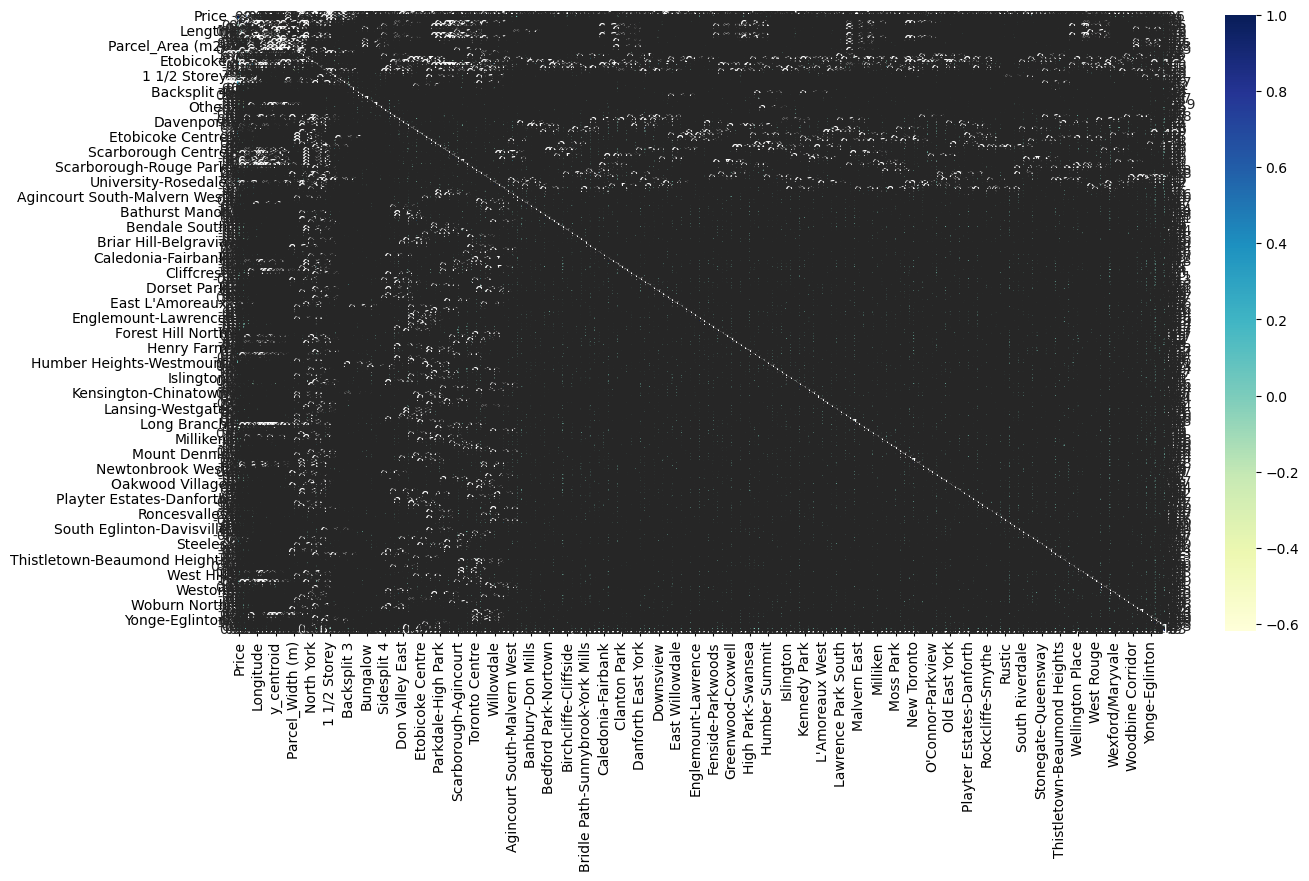

In [39]:
# Plot updated heatmap with new categories for municipalities 
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [40]:
# Create x and y variables to train and test data 
X = data.drop('Price', axis=1)
y = data['Price']

In [41]:
# Create train, test data variables, and split data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [42]:
imputer = MeanMedianImputer(imputation_method='median', variables=['Size'])
# we fit the imputer
imputer.fit(x_train)
imputed_train = imputer.fit_transform(x_train)
imputed_test = imputer.fit_transform(x_test)
imputer.imputer_dict_

{'Size': 2000.0}

In [43]:
# Implement decision tree regression model using training data 
model = DecisionTreeRegressor(random_state=0)
model.fit(imputed_train, y_train)

DecisionTreeRegressor(random_state=0)

In [44]:
# Determine model score using test data
score = model.score(imputed_test, y_test)
print(score)

0.5596769811478223


In [45]:
# Use model to predict prices and test x values 
y_pred = model.predict(imputed_test)
pred_data = pd.DataFrame({'Test': y_test, 'Pred': y_pred})
pred_data

,Test,Pred
1235,1149000,1399000.0
2252,2749000,2800000.0
589,1069900,1199900.0
1236,1999000,2625000.0
1883,1088000,1189000.0
...,...,...
743,1349000,999000.0
1302,2189000,2598000.0
2405,1488000,2150000.0
821,2698000,2758000.0


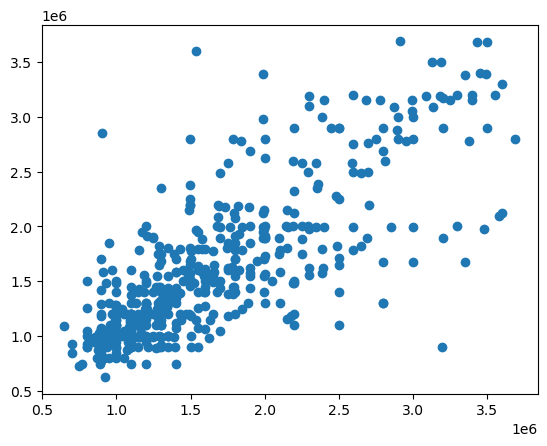

In [46]:
plt.scatter(x = pred_data['Test'], y = pred_data['Pred'])
plt.show()

In [47]:
from sklearn.metrics import r2_score
score = r2_score(pred_data['Test'], pred_data['Pred'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 56.00000000000001%


In [48]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(pred_data['Test'], pred_data['Pred'])
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 306012.58


In [49]:
score = np.sqrt(mean_absolute_error(pred_data['Test'], pred_data['Pred']))
print("The Root Mean Squared Error of our Model is {}".format(round(score, 2)))

The Root Mean Squared Error of our Model is 553.18


In [50]:
fig = px.density_mapbox(data, lat=x_test['Latitude'], lon=x_test['Longitude'], z = pred_data['Pred'], radius=25, center=dict(lat=data.Latitude.mean(), lon=data.Longitude.mean()), zoom=10,mapbox_style="open-street-map", height=900)
fig.show()